In [1]:
import pandas as pd
import numpy as np

In data warehousing, a best practice is to use socalled
dimension tables containing the distinct values and storing the primary observations
as integer keys referencing the dimension table

In [4]:
arr=pd.Series([0,1,0]*2)
arr

0    0
1    1
2    0
3    0
4    1
5    0
dtype: int64

In [8]:
dim=pd.Series(['apples','oranges'])
dim

0     apples
1    oranges
dtype: object

We can use the take method to restore the original Series of strings

In [9]:
dim.take(arr)

0     apples
1    oranges
0     apples
0     apples
1    oranges
0     apples
dtype: object

This representation as integers is called the categorical or dictionary-encoded representation.
The array of distinct values can be called the categories, dictionary, or levels
of the data

<b>Categorical Type in pandas</b>

pandas has a special Categorical type for holding data that uses the integer-based
categorical representation or encoding

In [10]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)

df = pd.DataFrame({'fruit': fruits,'basket_id': np.arange(N),'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},columns=['basket_id', 'fruit', 'count', 'weight'])

In [11]:
df

,basket_id,fruit,count,weight
0,0,apple,7,3.200725
1,1,orange,11,2.165895
2,2,apple,12,2.087070
3,3,apple,13,1.865974
4,4,apple,6,1.684175
5,5,orange,9,3.143949
6,6,apple,10,2.072282
7,7,apple,14,1.067893


In [12]:
fruit_cat = df['fruit'].astype('category')

In [13]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [16]:
fruit_cat.values.categories

Index(['apple', 'orange'], dtype='object')

In [17]:
fruit_cat.values.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [18]:
df['fruit'] = df['fruit'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   basket_id  8 non-null      int32   
 1   fruit      8 non-null      category
 2   count      8 non-null      int32   
 3   weight     8 non-null      float64 
dtypes: category(1), float64(1), int32(2)
memory usage: 360.0 bytes


You can also create pandas.Categorical directly from other types of Python
sequences

or

If you have obtained categorical encoded data from another source, you can use the
alternative from_codes constructor

Unless explicitly specified, categorical conversions assume no specific ordering of the
categories. So the categories array may be in a different order depending on the
ordering of the input data. When using from_codes or any of the other constructors,
you can indicate that the categories have a meaningful ordering:

In [22]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])

In [23]:
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [24]:
code=[0,1,2,1,2,0]

In [26]:
cats=['A','B','C']

In [29]:
pd.Categorical.from_codes(code,cats)

['A', 'B', 'C', 'B', 'C', 'A']
Categories (3, object): ['A', 'B', 'C']

In [31]:
pd.Categorical.from_codes(code,cats,ordered=True)

['A', 'B', 'C', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

An unordered categorical instance can be made ordered with as_ordered:

my_cats_2.as_ordered()

<b>Computations with Categoricals</b>

Using Categorical in pandas compared with the non-encoded version (like an array
of strings) generally behaves the same way. Some parts of pandas, like the groupby
function, perform better when working with categoricals

In [32]:
draws = np.random.randn(1000)

In [34]:
bins = pd.qcut(draws, 4,labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q1', 'Q2', 'Q1', 'Q2', 'Q1', ..., 'Q2', 'Q1', 'Q3', 'Q3', 'Q1']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

The labeled bins categorical does not contain information about the bin edges in the
data, so we can use groupby to extract some summary statistics

In [39]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index())

In [40]:
results

,quartile,count,min,max
0,Q1,250,-3.492122,-0.647480
1,Q2,250,-0.634337,0.040904
2,Q3,250,0.041559,0.650044
3,Q4,250,0.651590,2.952865


Better performance with categoricals

If you do a lot of analytics on a particular dataset, converting to categorical can yield
substantial overall performance gains. A categorical version of a DataFrame column
will often use significantly less memory, too.

In [43]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

#Now we convert labels to categorical:

categories = labels.astype('category')

#Now we note that labels uses significantly more memory than categories:

print(labels.memory_usage())
print(categories.memory_usage())

80000128
10000320


<b>GroupBy operations can be significantly faster with categoricals because the undunderlying
algorithms use the integer-based codes array instead of an array of strings.

<b>Categorical Methods</b>

Series containing categorical data have several special methods similar to the Ser
ies.str specialized string methods. This also provides convenient access to the categories
and codes

In [44]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')

In [45]:
#The special attribute cat provides access to categorical methods:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [46]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [47]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

While it appears that the data is unchanged, the new categories will be reflected in
operations that use them. For example, value_counts respects the categories, if
present

In [51]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [52]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In large datasets, categoricals are often used as a convenient tool for memory savings
and better performance. After you filter a large DataFrame or Series, many of the
categories may not appear in the data. To help with this, we can use the
remove_unused_categories method to trim unobserved categories

In [53]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [54]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

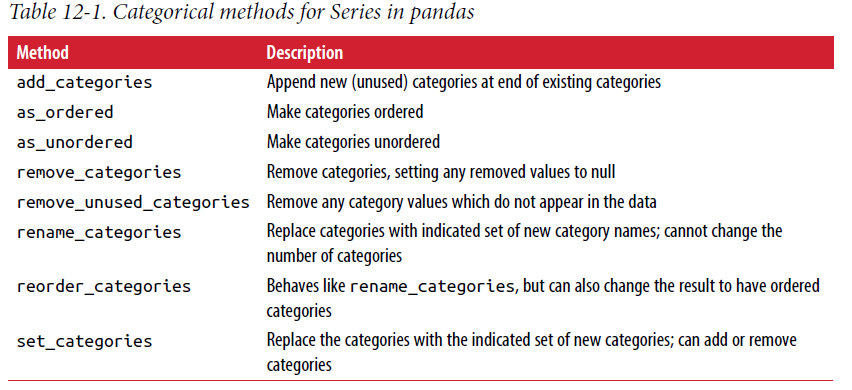